In [13]:
"""
    This notebook is used to generate the figures for the following section:
    "A Dopaminergic Neuron Model"
"""

'\n    This notebook is used to generate the figures for the following section:\n    "A Dopaminergic Neuron Model"\n'

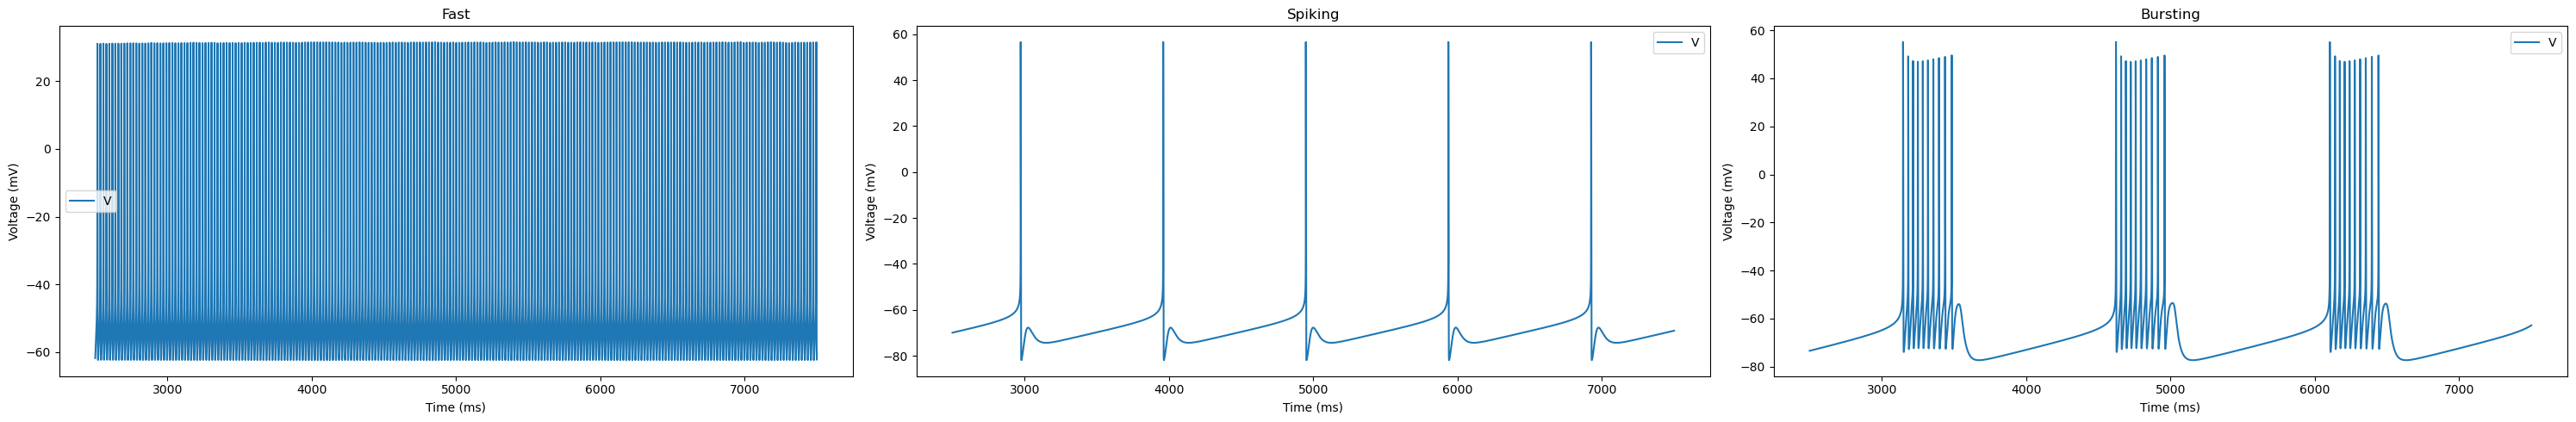

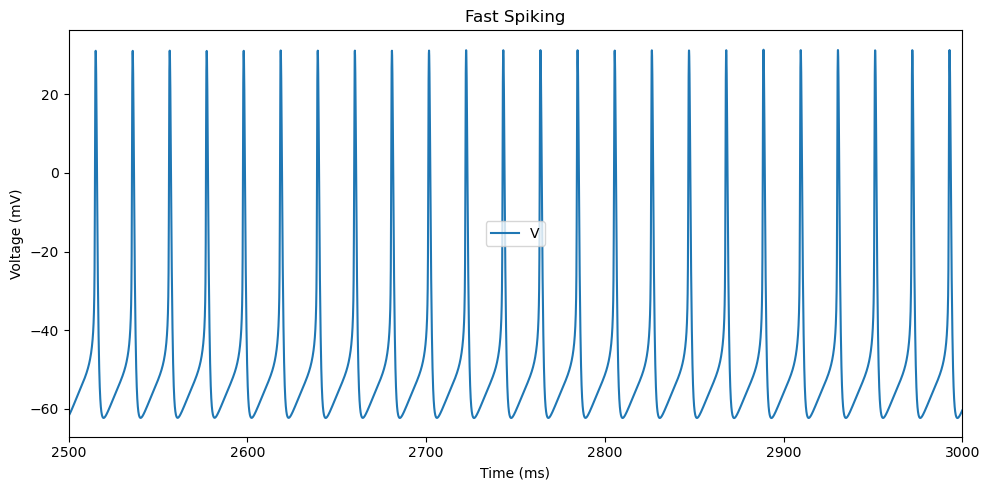

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from da import simulate_individual_t_eval
from da import get_default_u0
from da import get_default_parameters

g_fast = [29.336292266845703, 5.5535759925842285, 0.1873735636472702, 0.032879263162612915, 0.08885136991739273, 0.009971588850021362, 0.010677909478545189]
g_tonic_spiking = [34.11759567260742, 13.228670120239258, 0.02156803198158741, 0.05602838471531868, 0.20951703190803528, 0.011552166193723679, 0.01237044483423233]
g_bursting = [25.17587661743164, 7.032652378082275, 0.11249235272407532, 0.04820021241903305, 0.07778613269329071, 0.008483050391077995, 0.00908393319696188]

t_eval = np.arange(2500, 7500, 0.05)
sol_fast = simulate_individual_t_eval((get_default_u0(), g_fast, t_eval, get_default_parameters()))
sol_spiking = simulate_individual_t_eval((get_default_u0(), g_tonic_spiking, t_eval, get_default_parameters()))
sol_bursting = simulate_individual_t_eval((get_default_u0(), g_bursting, t_eval, get_default_parameters()))

fig, axes = plt.subplots(1, 3, figsize=(30, 5))

axes[0].plot(t_eval, sol_fast[1, :], label='V')
axes[0].set_title('Fast')
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Voltage (mV)')
axes[0].legend()

axes[1].plot(t_eval, sol_spiking[1, :], label='V')
axes[1].set_title('Spiking')
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Voltage (mV)')
axes[1].legend()

axes[2].plot(t_eval, sol_bursting[1, :], label='V')
axes[2].set_title('Bursting')
axes[2].set_xlabel('Time (ms)')
axes[2].set_ylabel('Voltage (mV)')
axes[2].legend()

fig.tight_layout()
plt.savefig('figures/da_fast_spiking_bursting.svg')
plt.show()

# zoom only for the fast spiking 
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
axes.plot(t_eval, sol_fast[1, :], label='V')
axes.set_title('Fast Spiking')
axes.set_xlabel('Time (ms)')
axes.set_ylabel('Voltage (mV)')
axes.set_xlim(2500, 3000)
axes.legend()
fig.tight_layout()
plt.savefig('figures/da_fast_spiking_zoom.svg')
plt.show()

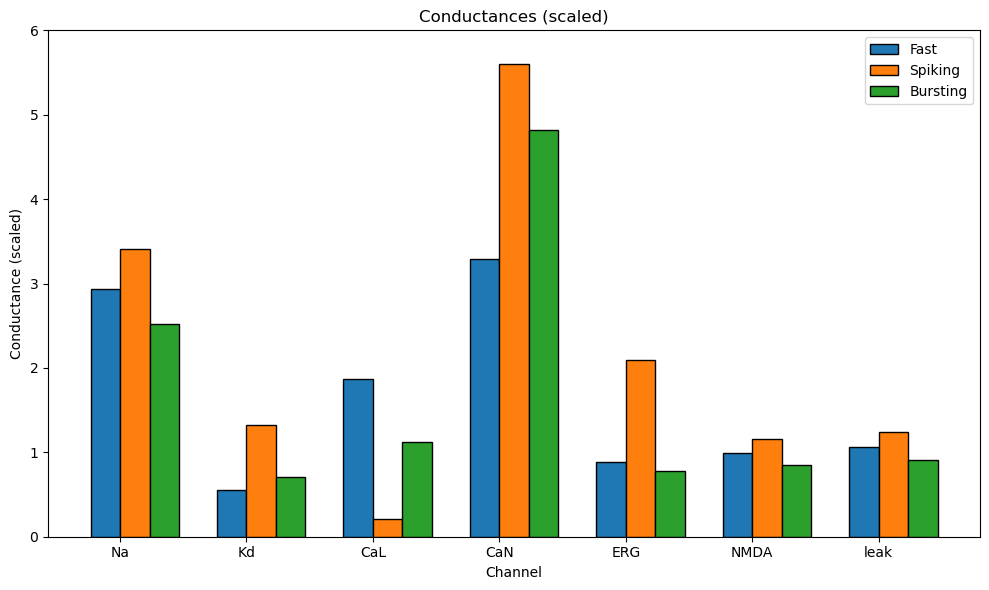

In [34]:
# Introduce y scaling factor because the channels have really different scales
scaling_factors = [1e-1, 1e-1, 1e1, 1e2, 1e1, 1e2, 1e2]

# bar plot of the conductances with scaling
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35*2/3
index = np.arange(7)
scaled_g_fast = [g * s for g, s in zip(g_fast, scaling_factors)]
scaled_g_tonic_spiking = [g * s for g, s in zip(g_tonic_spiking, scaling_factors)]
scaled_g_bursting = [g * s for g, s in zip(g_bursting, scaling_factors)]

bar1 = ax.bar(index, scaled_g_fast, bar_width, label='Fast', edgecolor='black')
bar2 = ax.bar(index + bar_width, scaled_g_tonic_spiking, bar_width, label='Spiking', edgecolor='black')
bar3 = ax.bar(index + 2 * bar_width, scaled_g_bursting, bar_width, label='Bursting', edgecolor='black')
ax.set_xlabel('Channel')
ax.set_ylabel('Conductance (scaled)')
ax.set_title('Conductances (scaled)')
ax.set_xticks(index + bar_width / 2)
"""    S_Na = S_Na[:, :, np.newaxis, :]
    S_Kd = S_Kd[:, :, np.newaxis, :]
    S_CaL = S_CaL[:, :, np.newaxis, :]
    S_CaN = S_CaN[:, :, np.newaxis, :]
    S_ERG = S_ERG[:, :, np.newaxis, :]
    S_NMDA = S_NMDA[:, :, np.newaxis, :]
    S_leak = S_leak[:, :, np.newaxis, :]"""
ax.set_xticklabels(['Na', 'Kd', 'CaL', 'CaN', 'ERG', 'NMDA', 'leak'])
ax.set_ylim(0,6)
ax.legend()
fig.tight_layout()
plt.savefig('figures/da_conductances_scaled.svg')
plt.show()
